In [2]:
import math
import sympy
import numpy as np
from sympy.abc import x,y
from sympy import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
init_printing( use_latex='mathjax' )
f = Function("f")

1. Реализовать предложенный метод численного решения данной системы уравнений

In [3]:
t_d=24*60*60
c=np.array([0,0,5*(10**11),8*(10**11)])
k=np.array([0,10**5,10**(-16)])

# функция, описывающая систему ОДУ
def f(t, x):
    x1,x2,x3,x4=x
    k[0]=(10**(-2))*max(0,math.sin(2*math.pi*t/t_d))
    y=np.zeros(4)
    y[0]=k[0]*x3-k[1]*x1
    y[1]=k[0]*x3-k[2]*x2*x4
    y[2]=k[2]*x2*x4-k[0]*x3
    y[3]=k[1]*x1-k[2]*x2*x4
    return y

In [4]:
def runge_kutta(f, c10, c20, c30, c40, T, h):
    N = int(T/h) # вычисляем количество шагов
#    Y=np.zeros((np.zeros(N+1),4))
    c1 = np.zeros(N+1) # создаем массив для значений c1
    c2 = np.zeros(N+1) # создаем массив для значений c2
    c3 = np.zeros(N+1) # создаем массив для значений c3
    c4 = np.zeros(N+1) # создаем массив для значений c4
    c=[c1,c2,c3,c4]
    t = np.linspace(0, T, N+1) # создаем массив для значений времени
    c1[0], c2[0], c3[0], c4[0] = c10, c20, c30, c40 # задаем начальные условия
    # создаем таблицу коэффициентов метода Бутчера
    A = np.array([[1, 0, 0],
                  [0, 1/3, 0],
                  [-1/12, 3/4, 1/3]])
    b = np.array([-1/12, 3/4, 1/3])
    coef = np.array([1, 1/3, 1])
    # основной цикл метода Рунге-Кутты
    
    ys=[[0,0,0,0,0,0,0,0,0,0,0,0]]
    for i in range(N):
        def func(Y):
            Y=[[Y[0],Y[1],Y[2],Y[3]],
               [Y[4],Y[5],Y[6],Y[7]],
               [Y[8],Y[9],Y[10],Y[11]]]
            
            answer=[]
            for j in range(4):
                for k in range(3):
                    answer.append(-Y[k][j]+c[j][i]+ h*(A[k,0] * f(t[i] + coef[0]*h,Y[0])[j] + A[k,1] * f(t[i] + coef[1]*h,Y[1])[j] + A[k,2] * f(t[i] + coef[2]*h,Y[2])[j]))
            return answer
               
        Y=fsolve(func,ys[-1])
        ys.append(Y)
        Y=[[Y[0],Y[1],Y[2],Y[3]],
            [Y[4],Y[5],Y[6],Y[7]],
            [Y[8],Y[9],Y[10],Y[11]]]
        
        for j in range(4):
            c[j][i+1]=c[j][i]+h*(b[0]*f(t[i] + coef[0]*h,Y[0])[j] + b[1]*f(t[i] + coef[1]*h,Y[1])[j] + b[2]*f(t[i] + coef[2]*h,Y[2])[j])
    return t, c1, c2, c3, c4

2. Построить графики численного решения

D:\Python\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


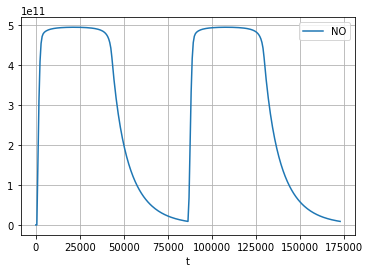

In [20]:
# Задаем начальные условия и параметры задачи
c10, c20, c30, c40 = 0, 0, 5*(10**11), 8*(10**11)
T, h = 2*24*60*60, 60*10
# Вызываем функцию для решения системы ОДУ методом Рунге-Кутты
t, s1, s2, s3, s4 = runge_kutta(f, c10, c20, c30, c40, T, h)
# Рисуем графики решений u(t) и v(t)
plt.plot(t, s2, label='NO')
plt.legend()
plt.xlabel('t')
plt.grid()
plt.show()

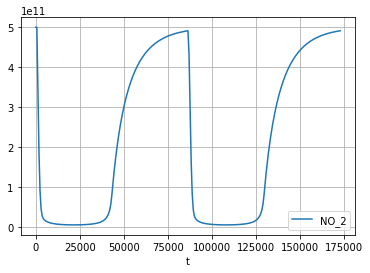

In [21]:
plt.plot(t, s3, label='NO_2')
plt.legend()
plt.xlabel('t')
plt.grid()
plt.show()

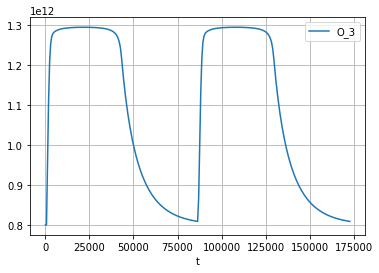

In [22]:
plt.plot(t, s4, label='O_3')
plt.legend()
plt.xlabel('t')
plt.grid()
plt.show()

3. Экспериментально определить шаг по времени, при котором явный метод Эйлера для данной задачи устойчив

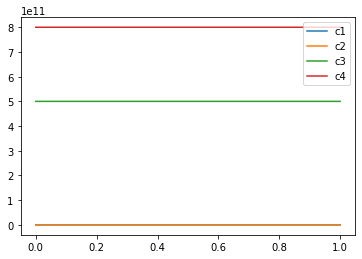

In [15]:
def euler(f, t0, c0, T, h):
    t = [t0]
    c = [c0]
    while t[-1] < T:
        tn = t[-1]
        cn = c[-1]
        cn1 = cn + h * f(tn, cn)
        tn1 = tn + h
        t.append(tn1)
        c.append(cn1)
    return np.array(t), np.array(c)

def fttt(t, c):
    k1 = 1e-2 * max(0, np.sin(2 * np.pi * t / 24 / 60 / 60))
    k2 = 1e5
    k3 = 1e-16
    c1, c2, c3, c4 = c
    c1p = k1 * c3 - k2 * c1
    c2p = k1 * c3 - k3 * c2 * c4
    c3p = k3 * c2 * c4 - k1 * c3
    c4p = k2 * c1 - k3 * c2 * c4
    return np.array([c1p, c2p, c3p, c4p])

t0, c0 = 0, np.array([0, 0, 5e11, 8e11])
T, h = 1, 10**(-5)
t, c = euler(fttt, t0, c0, T, h)

plt.plot(t, c[:, 0], label='c1')
plt.plot(t, c[:, 1], label='c2')
plt.plot(t, c[:, 2], label='c3')
plt.plot(t, c[:, 3], label='c4')
plt.legend()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2800\1484404962.py:19: RuntimeWarning: overflow encountered in double_scalars
  c2p = k1 * c3 - k3 * c2 * c4
C:\Users\USER\AppData\Local\Temp\ipykernel_2800\1484404962.py:20: RuntimeWarning: overflow encountered in double_scalars
  c3p = k3 * c2 * c4 - k1 * c3
C:\Users\USER\AppData\Local\Temp\ipykernel_2800\1484404962.py:21: RuntimeWarning: overflow encountered in double_scalars
  c4p = k2 * c1 - k3 * c2 * c4
C:\Users\USER\AppData\Local\Temp\ipykernel_2800\1484404962.py:19: RuntimeWarning: invalid value encountered in double_scalars
  c2p = k1 * c3 - k3 * c2 * c4
C:\Users\USER\AppData\Local\Temp\ipykernel_2800\1484404962.py:20: RuntimeWarning: invalid value encountered in double_scalars
  c3p = k3 * c2 * c4 - k1 * c3


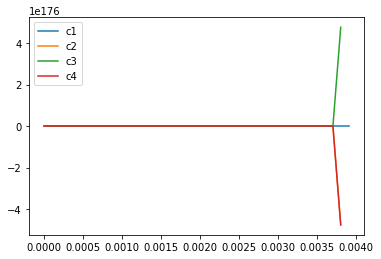

In [17]:
T, h = 1, 10**(-4)
t, c = euler(fttt, t0, c0, T, h)

plt.plot(t, c[:, 0], label='c1')
plt.plot(t, c[:, 1], label='c2')
plt.plot(t, c[:, 2], label='c3')
plt.plot(t, c[:, 3], label='c4')
plt.legend()
plt.show()

4. Сравнить с шагом по времени, который позволяет использовать предложенный метод численного решения

$$R(z) = \frac{det(I - z \cdot A + z \cdot e \cdot b^T)}{det(I - z \cdot A)}$$

Числитель:

\begin{equation*}
det
\begin{pmatrix}
1-z-\frac{z}{12} & \frac{3z}{4} & \frac{z}{3}\\
\frac{-z}{12} & 1-\frac{z}{3}+\frac{3z}{4} & \frac{z}{3}\\
\frac{z}{12}-\frac{z}{12} & \frac{-3z}{4} + \frac{3z}{4}  & 1 - \frac{z}{3} + \frac{z}{3}
\end{pmatrix}
\end{equation*}

\begin{equation*}
det
\begin{pmatrix}
1-\frac{13z}{12} & \frac{3z}{4} & \frac{z}{3}\\
\frac{-z}{12} & 1+\frac{5z}{12} & \frac{z}{3}\\
0 & 0  & 1
\end{pmatrix}
= -\frac{7}{18}z^2 - \frac{2}{3}z+1
\end{equation*}


Знаменатель:

\begin{equation*}
det
\begin{pmatrix}
1-z & 0 & 0\\
0 & 1-\frac{z}{3} & 0\\
\frac{z}{12} & \frac{-3z}{4}  & 1 - \frac{z}{3}
\end{pmatrix}
= -\frac{z^3}{9} + \frac{7}{9}z^2 - \frac{5}{3}z+1 = -\frac{1}{9}(z-3)^2(z-1)
\end{equation*}

Итого имеем:

$$|\frac{-\frac{7}{18}z^2 - \frac{2}{3}z+1}{-\frac{z^3}{9} + \frac{7}{9}z^2 - \frac{5}{3}z+1}| \leq 1$$

Откуда найдем что неявный метод является А-устойчивым, а явный Эйлер только при очень очень маленьких $\Delta t$, порядка $10^{-5}$